<a href="https://colab.research.google.com/github/Rachev2002/eda_and_dev_tools/blob/eda/Shopers_%D0%92%D1%8B%D0%BF%D0%BE%D0%BB%D0%BD%D0%B5%D0%BD%D0%BD%D1%8B%D0%B9_%D1%80%D0%B0%D0%B7%D0%B2%D0%B5%D0%B4%D0%BE%D1%87%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
# Чтение файла CSV
df = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/online_shoppers_intention.csv', sep=',')

In [3]:
# Выведем первые 5 значений
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### 1. Общее исследование данных: проверить размеры таблицы, число столбцов, количество пропусков в столбцах (1 балл).

In [4]:
df.shape # размеры таблицы

(12330, 18)

In [5]:
len(df.columns) # число столбцов

18

In [6]:
df.isna().sum() # количество пропусков в столбцах

Administrative               0
Administrative_Duration      0
Informational                0
Informational_Duration     199
ProductRelated               0
ProductRelated_Duration    491
BounceRates                  0
ExitRates                   99
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems             0
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

### 2. Однофакторный анализ: по каждому столбцу посмотреть его распределение. Если есть пропуски и ошибочные значения - обработать их. Посмотреть связь с целевой переменной (3 балла).

In [7]:
df.duplicated().sum()

109

In [8]:
df.drop_duplicates(inplace=True)

df.shape

(12221, 18)

In [9]:
df.info() # Выведем информацию о данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12221 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12221 non-null  int64  
 1   Administrative_Duration  12221 non-null  float64
 2   Informational            12221 non-null  int64  
 3   Informational_Duration   12022 non-null  float64
 4   ProductRelated           12221 non-null  int64  
 5   ProductRelated_Duration  11732 non-null  float64
 6   BounceRates              12221 non-null  float64
 7   ExitRates                12122 non-null  float64
 8   PageValues               12221 non-null  float64
 9   SpecialDay               12221 non-null  float64
 10  Month                    12221 non-null  object 
 11  OperatingSystems         12221 non-null  int64  
 12  Browser                  12221 non-null  int64  
 13  Region                   12221 non-null  int64  
 14  TrafficType           

In [10]:
df.describe() # Для каждого числового столбца выводим распределение значений

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12221.000000,12221.000000,12221.000000,12022.000000,12221.000000,11732.000000,12221.000000,12122.000000,12221.000000,12221.000000,12221.000000,12221.000000,12221.000000,12221.000000
mean,2.335815,81.539438,0.508060,35.039339,32.005073,1201.393015,0.020605,0.041609,5.941785,0.061861,2.123558,2.356845,3.152115,4.070616
std,3.329330,177.400179,1.274914,142.257692,44.578528,1913.726058,0.045690,0.046432,18.642697,0.199548,0.906759,1.709433,2.401892,4.015172
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,191.459375,0.000000,0.014272,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,606.283333,0.002941,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.600000,0.000000,0.000000,38.000000,1475.191667,0.016667,0.048705,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [11]:
df.describe(include=['object', 'bool']) # Для каждого нечислового столбца выводим распределение значений

,Month,VisitorType,Weekend,Revenue
count,12221,12221,12221,12221
unique,11,3,2,2
top,May,Returning_Visitor,False,False
freq,3316,10446,9360,10313


1) По числовым графикам видно, что не нулевых значений нет.    
2) Я так понимаю, что большое количество посетителей сайта долгое время задерживаются на странице 0. И их дальнейшая активность резко снижается.    
3) Specialday - близость к праздничному дню. Активность посещения сайта в праздники минимальная.


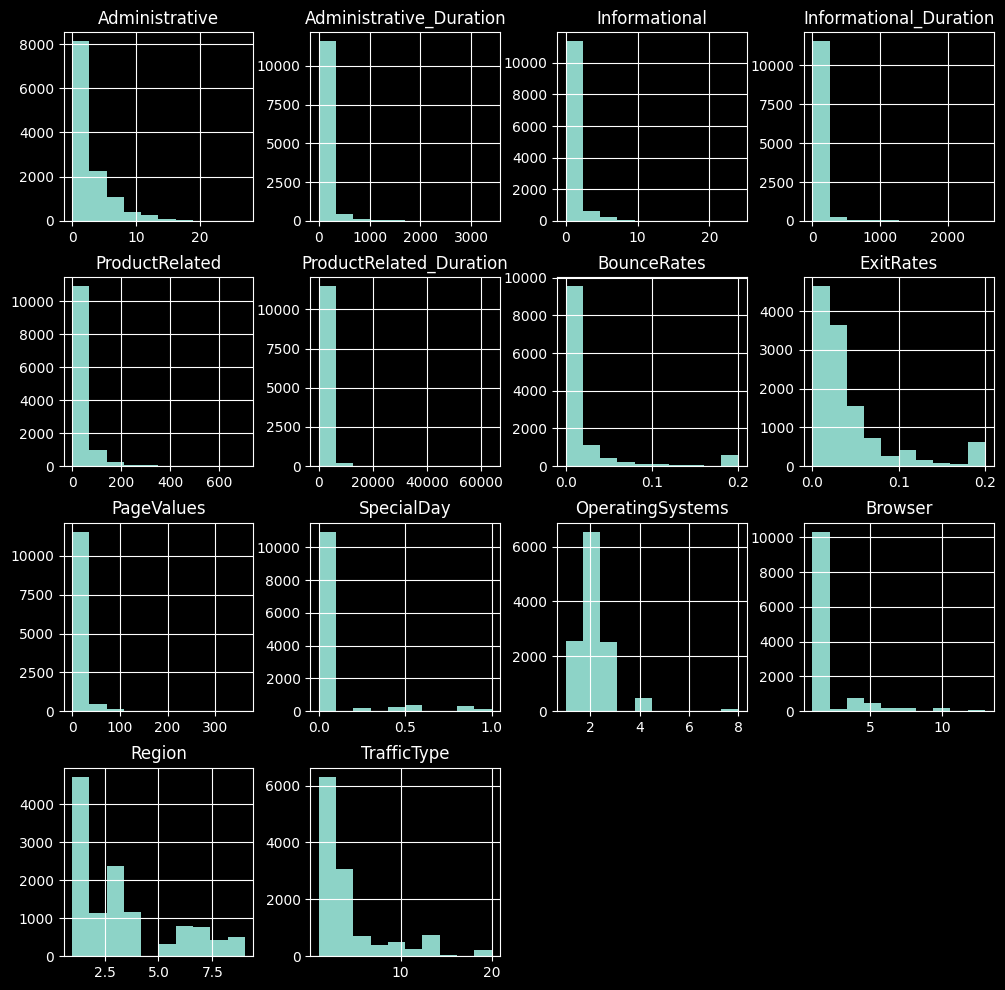

In [12]:
df.hist(bins=10, figsize=(12,12)); # Для каждого столбца выводим распределение значений

In [13]:
df.SpecialDay.value_counts()

0.0    10972
0.6      350
0.8      324
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

In [14]:
df.Month.value_counts() # значение aug и Aug - нужно исправить

May     3316
Nov     2965
Mar     1857
Dec     1696
Oct      545
Sep      446
Aug      431
Jul      429
June     285
Feb      181
aug       70
Name: Month, dtype: int64

In [15]:
df['Month'] = df['Month'].replace('aug', 'Aug')

In [16]:
df.Month.nunique() # всего 10 месяцев. 2 не хватает "Jan", "Apr"

10

<Axes: ylabel='Month'>

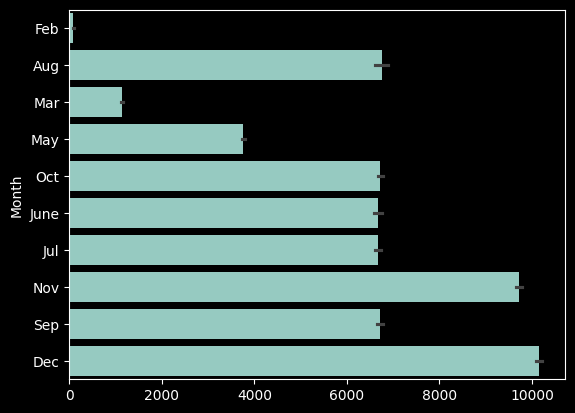

In [17]:
sns.barplot(df.Month)

In [18]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "June",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['months'] = pd.Categorical(df['Month'], categories=months, ordered=True)

Покупательские намерения интернет-покупателей возростали в ноябре и декабре. То есть ближе к Новогодним праздникам. Но с января по май намерения были минимальными

<Axes: ylabel='months'>

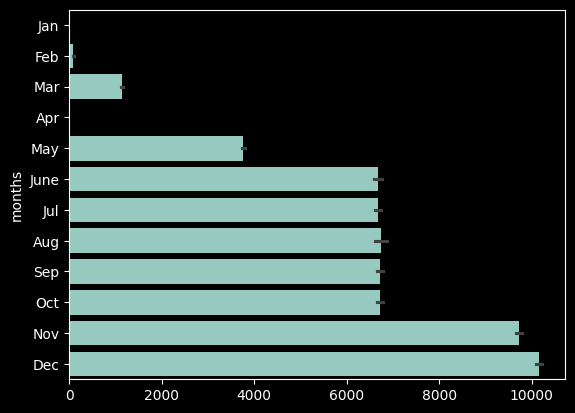

In [19]:
sns.barplot(df.months) # график по месяцам

<Axes: ylabel='VisitorType'>

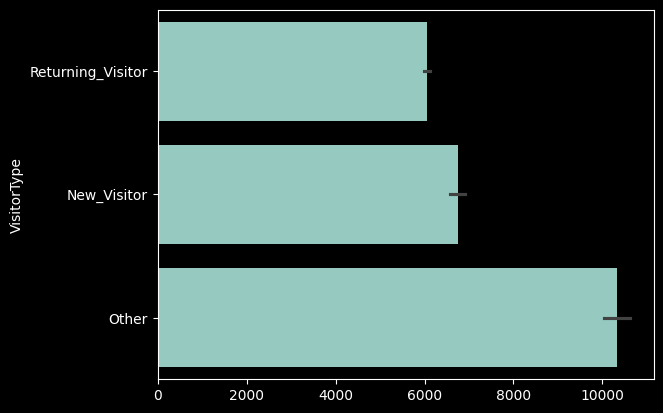

In [20]:
sns.barplot(df.VisitorType)

большое количество посещений сайта в не выходные дни

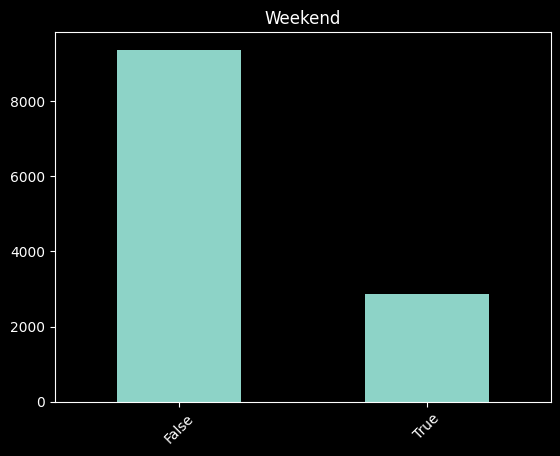

In [21]:
df.Weekend.value_counts().plot(kind="bar")
plt.title('Weekend')
plt.xticks(rotation=45)
plt.show()

Целевая переменная Revenue имеет больше False, чем True

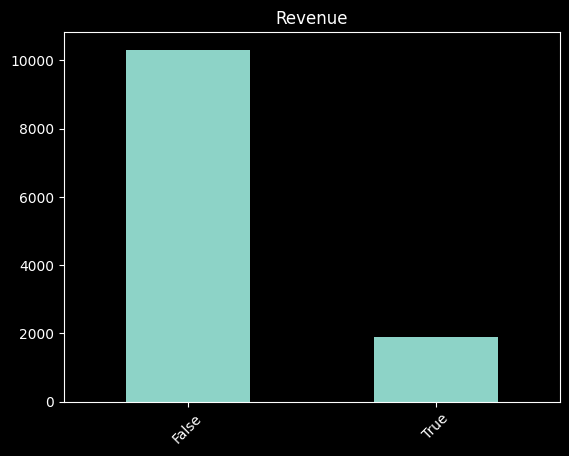

In [22]:
df.Revenue.value_counts().plot(kind="bar")
plt.title('Revenue')
plt.xticks(rotation=45)
plt.show()

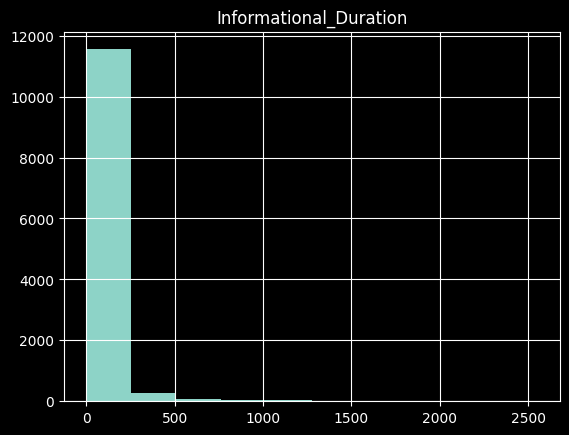

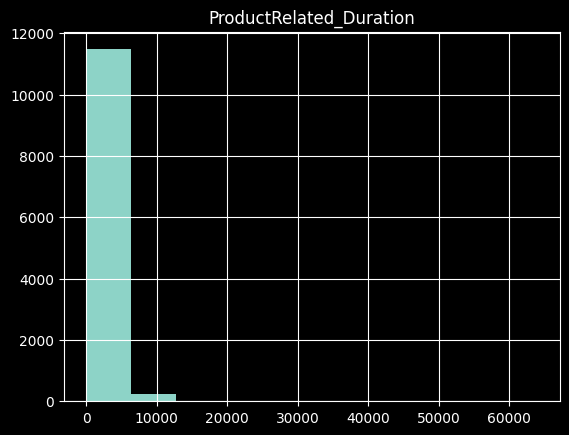

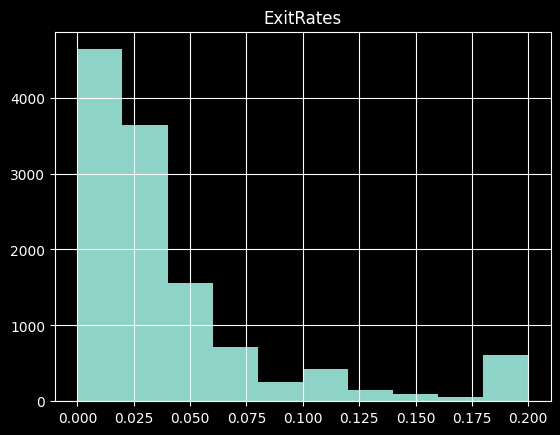

In [23]:
# посмотрим график распределения значений в столбцах с пропущенными значениями

plt.hist(df.Informational_Duration)
plt.title('Informational_Duration')
plt.grid(True)
plt.show()

plt.hist(df.ProductRelated_Duration)
plt.title('ProductRelated_Duration')
plt.grid(True)
plt.show()

plt.hist(df.ExitRates)
plt.title('ExitRates')
plt.grid(True)
plt.show()

По графикам видно неравномерность распределения, поэтому следует заменить пустые значения медианой

In [24]:
df.isnull().mean() * 100

Administrative             0.000000
Administrative_Duration    0.000000
Informational              0.000000
Informational_Duration     1.628345
ProductRelated             0.000000
ProductRelated_Duration    4.001309
BounceRates                0.000000
ExitRates                  0.810081
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
OperatingSystems           0.000000
Browser                    0.000000
Region                     0.000000
TrafficType                0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
months                     0.000000
dtype: float64

In [25]:
ExitRates_median = df['ExitRates'].median()

df['ExitRates'] = df['ExitRates'].fillna(ExitRates_median)

In [26]:
ProductRelated_Duration_median = df['ProductRelated_Duration'].median()

df['ProductRelated_Duration'] = df['ProductRelated_Duration'].fillna(ProductRelated_Duration_median)

In [27]:
Informational_Duration_median = df['Informational_Duration'].median()

df['Informational_Duration'] = df['Informational_Duration'].fillna(Informational_Duration_median)

In [28]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'months'],
      dtype='object')

Таблицы корреляция показывает связь Revenue и PageValues в 0.5. посещ

In [29]:
# df.groupby('Administrative').agg(PageValues_m = ('PageValues','mean'))

### Построить матрицу корреляций (или ее аналог для категориальных признаков): использовать корреляции, тест χ2, ANOVA (2 балла).

<ipython-input-30-e127583fd1f9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(2) # матрица корреляций


<Axes: >

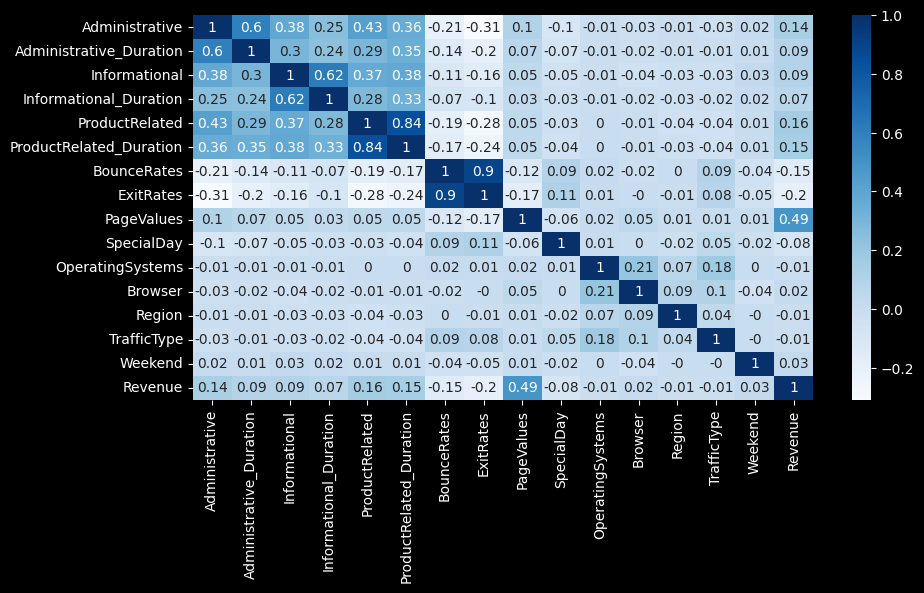

In [30]:
plt.figure(figsize=(10, 5))

corr = df.corr().round(2) # матрица корреляций

sns.heatmap(corr, cmap="Blues", annot=True)

корреляция спирмена показывает связь Revenue и PageValues в 0.63

<ipython-input-31-4d997c9c019c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='spearman').round(2) # матрица корреляций Спирмена


<Axes: >

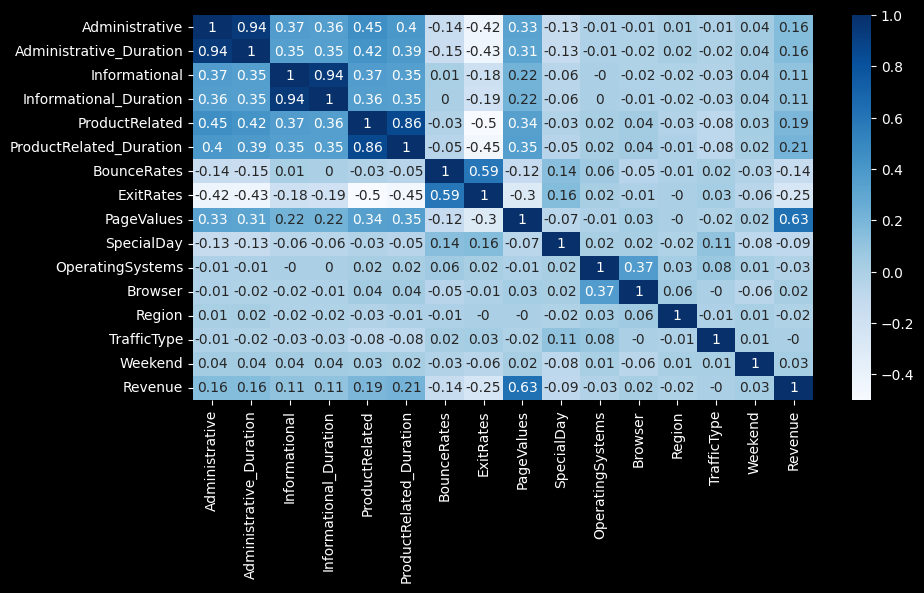

In [31]:
plt.figure(figsize=(10, 5))

corr = df.corr(method='spearman').round(2) # матрица корреляций Спирмена

sns.heatmap(corr, cmap="Blues", annot=True)

корреляция кенделла показывает связь Revenue и PageValues в 0.63

<ipython-input-32-d30ebda159e5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='kendall').round(2) # матрица корреляций Кенделла


<Axes: >

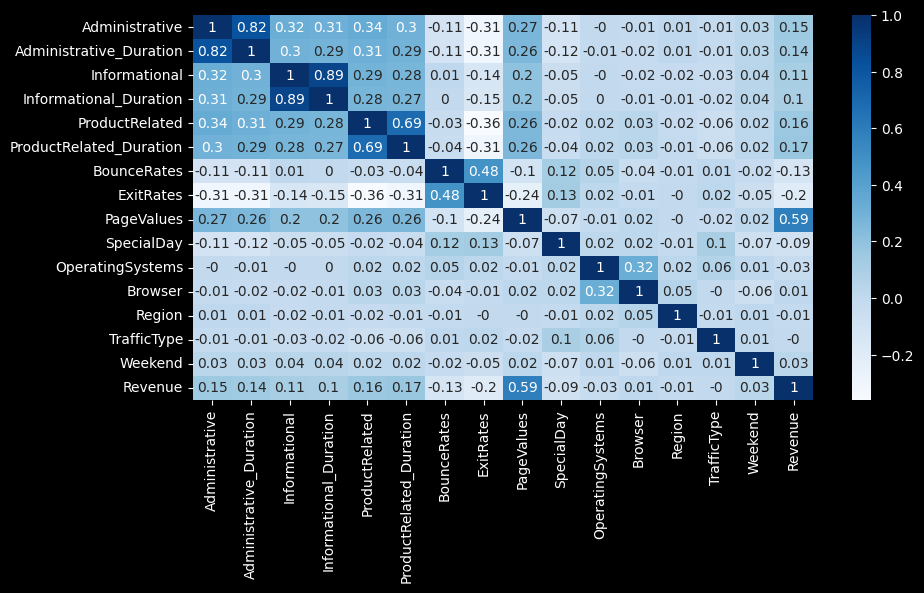

In [32]:
plt.figure(figsize=(10, 5))

corr = df.corr(method='kendall').round(2) # матрица корреляций Кенделла

sns.heatmap(corr, cmap="Blues", annot=True)

V-мера Крамера (X^2)

*Для измерения связи между Категориальным - Категориальным признаком*

In [33]:
!pip install association-metrics -q

  Preparing metadata (setup.py) ... done


связь с категориальными переменными не значительна

In [75]:
import association_metrics as am

df_cat = df.apply(lambda x: x.astype("category") if (x.dtype == "object") | (x.dtype == "bool") else x)

cramersv = am.CramersV(df_cat)

cramersv.fit()

,VisitorType,Weekend,Revenue,months
VisitorType,1.000000,0.053418,0.103550,0.137251
Weekend,0.053418,1.000000,0.027858,0.064912
Revenue,0.103550,0.027858,1.000000,0.175457
months,0.137251,0.064912,0.175457,1.000000


<Axes: >

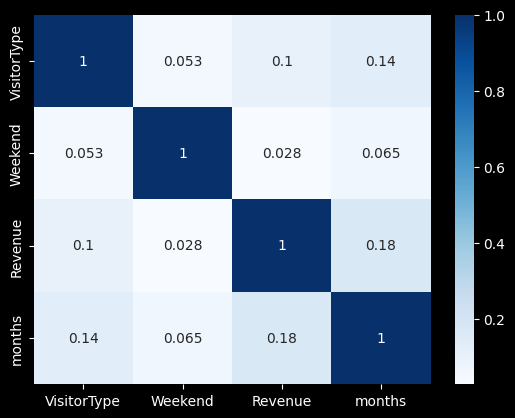

In [76]:
sns.heatmap(cramersv.fit(), cmap="Blues", annot=True)

In [36]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'months'],
      dtype='object')

ANOVA

In [37]:
from scipy.stats import f_oneway

# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list

CategoryGroupLists = df.groupby('Revenue')['Administrative'].apply(list)

# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value >= 0.05

AnovaResults = f_oneway(*CategoryGroupLists)

print('P-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')

P-Value for Anova is:  4.958159624567688e-52
Features are correlated


In [63]:
df = df.drop('Month', axis=1)

In [73]:
M = df.drop('months', axis=1)

По АНОВА переменные коррелируют

In [74]:
Data = []

for c1 in M.columns:
    for c2 in M.columns:
        if M[c1].dtype == 'object' and M[c2].dtype != 'object':
            CategoryGroupLists = M.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,VisitorType,Administrative,Yes
1,VisitorType,Administrative_Duration,Yes
2,VisitorType,Informational,Yes
3,VisitorType,Informational_Duration,Yes
4,VisitorType,ProductRelated,Yes
5,VisitorType,ProductRelated_Duration,Yes
6,VisitorType,BounceRates,Yes
7,VisitorType,ExitRates,Yes
8,VisitorType,PageValues,Yes
9,VisitorType,SpecialDay,Yes


# Провести анализ целевой переменной - на какое распределение больше всего похожа ее гистограмма? Какие проблемы в связи с этим могут возникнуть при обучении моделей? (1 балл)

Целевая переменная у нас имеет 2 значения либо True, либо False. У нас задача классификации - будет совершена покупка или нет. Поэтому посмотреть на распределенние, как в регрессии, и определить вид распределения не получится.   



Но я могу сказать, судя по нашей гистограмме, что у нас дисбаланс классов. Значение False преобладает. Примерное соотношение 85/15

In [91]:
round(df.Revenue.value_counts()[0] / df.Revenue.count(), 2)

0.84

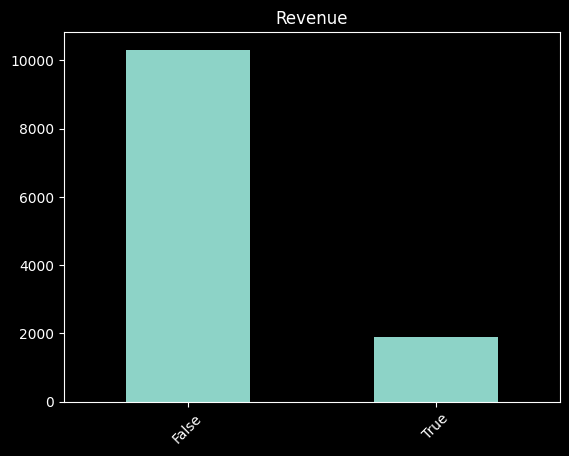

In [83]:
df.Revenue.value_counts().plot(kind="bar")
plt.title('Revenue')
plt.xticks(rotation=45)
plt.show()

# Увеличить размер данных простым дублированием до 1_000_000 строк в датасете. Провести сравнение скорости работы Pandas и Polars на увеличенном датасете по параметрам:


загрузка данных (1 балл)


фильтрация данных (1 балл)


агрегация данных (1 балл)



In [101]:
df_big = df.copy()

for i in range(81):
  df_big = pd.concat([df_big, df])

df_big.to_csv("online_shoppers_intention.csv", index=False)

In [102]:
df_big.shape, df.shape

((1002122, 18), (12221, 18))

In [103]:
!pip install polars

import polars as pl

print(pl.__version__)

0.20.2


### Загрузка данных

При загрузке данных polars быстрее pandas

In [104]:
%%time

df_pl = pl.read_csv("/content/online_shoppers_intention.csv")

CPU times: user 1.16 s, sys: 299 ms, total: 1.46 s
Wall time: 1.52 s


In [105]:
%%time

df = pd.read_csv("/content/online_shoppers_intention.csv")

CPU times: user 2.45 s, sys: 127 ms, total: 2.57 s
Wall time: 5.02 s


### Выбор и фильтрация данных

In [106]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,months
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,Returning_Visitor,False,False,Feb
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,Returning_Visitor,False,False,Feb
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,Returning_Visitor,False,False,Feb
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,Returning_Visitor,False,False,Feb
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,Returning_Visitor,True,False,Feb


При отборе данных polars быстрее pandas

In [107]:
%%time

df[['Region', 'TrafficType']]

CPU times: user 6.26 ms, sys: 9 µs, total: 6.27 ms
Wall time: 19.1 ms


,Region,TrafficType
0,1,1
1,1,2
2,9,3
3,2,4
4,1,4
...,...,...
1002117,1,1
1002118,1,8
1002119,1,13
1002120,3,11


In [110]:
%%time
df_pl.select(pl.col(['Region', 'TrafficType']))

CPU times: user 1.7 ms, sys: 0 ns, total: 1.7 ms
Wall time: 7.77 ms


Region,TrafficType
i64,i64
1,1
1,2
9,3
2,4
1,4
1,3
3,3
1,5
2,3


In [108]:
%%time

df_pl[['Region', 'TrafficType']]


CPU times: user 792 µs, sys: 1 ms, total: 1.79 ms
Wall time: 13.7 ms


Region,TrafficType
i64,i64
1,1
1,2
9,3
2,4
1,4
1,3
3,3
1,5
2,3


При фильтрации данных pandas быстрее  polars

In [124]:
# Pandas
%%time

df.query('ExitRates > 0.1')

CPU times: user 26 ms, sys: 0 ns, total: 26 ms
Wall time: 27.9 ms


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,months
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,1,1,1,1,Returning_Visitor,False,False,Feb
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,4,1,9,3,Returning_Visitor,False,False,Feb
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,3,2,2,4,Returning_Visitor,False,False,Feb
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,2,4,3,3,Returning_Visitor,False,False,Feb
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,1,2,1,5,Returning_Visitor,True,False,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002012,0,0.0,0,0.0,2,0.000000,0.200000,0.200000,0.0,0.0,2,5,1,2,Returning_Visitor,False,False,Nov
1002040,0,0.0,0,0.0,7,1749.000000,0.047619,0.104762,0.0,0.0,2,2,1,2,Returning_Visitor,False,False,Dec
1002082,0,0.0,0,0.0,20,1008.500000,0.080000,0.120000,0.0,0.0,2,2,3,1,Returning_Visitor,True,False,Dec
1002093,0,0.0,0,0.0,2,0.000000,0.200000,0.200000,0.0,0.0,1,1,4,1,Returning_Visitor,False,False,Nov


In [126]:
# Polars
%%time

df_pl.filter(pl.col('ExitRates') > 0.1)

CPU times: user 40.9 ms, sys: 16.1 ms, total: 57 ms
Wall time: 38.3 ms


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,months
i64,f64,i64,f64,i64,f64,f64,f64,f64,f64,i64,i64,i64,i64,str,bool,bool,str
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,1,1,1,1,"""Returning_Visi…",false,false,"""Feb"""
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,4,1,9,3,"""Returning_Visi…",false,false,"""Feb"""
0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,"""Returning_Visi…",false,false,"""Feb"""
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.4,2,4,3,3,"""Returning_Visi…",false,false,"""Feb"""
1,0.0,0,0.0,0,0.0,0.2,0.2,0.0,0.0,1,2,1,5,"""Returning_Visi…",true,false,"""Feb"""
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,1,1,4,3,"""Returning_Visi…",false,false,"""Feb"""
0,0.0,0,0.0,2,0.0,0.2,0.2,0.0,0.0,3,3,1,3,"""Returning_Visi…",false,false,"""Feb"""
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,2,2,4,1,"""Returning_Visi…",true,false,"""Feb"""
0,0.0,0,0.0,3,80.0,0.066667,0.133333,0.0,0.2,3,2,1,3,"""Returning_Visi…",false,false,"""Feb"""


При фильтрации данных pandas быстрее  polars

In [133]:

%%time

#df.query('color = "J" & price > 1000')

df[(df.Revenue == 'True') & (df.PageValues > 3)]

CPU times: user 7.25 ms, sys: 0 ns, total: 7.25 ms
Wall time: 7.24 ms


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,months


In [134]:
%%time

df_pl.filter((pl.col('Revenue') == 'True') & (pl.col('PageValues') > 3))

CPU times: user 25.3 ms, sys: 6.04 ms, total: 31.4 ms
Wall time: 31.7 ms


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,months
i64,f64,i64,f64,i64,f64,f64,f64,f64,f64,i64,i64,i64,i64,str,bool,bool,str


При агрегации данных polars  быстрее  pandas

### Агрегация данных

In [ ]:
df_pl['VisitorType']

In [137]:
df_pl.head()

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,months
i64,f64,i64,f64,i64,f64,f64,f64,f64,f64,i64,i64,i64,i64,str,bool,bool,str
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,1,1,1,1,"""Returning_Visi…",false,false,"""Feb"""
0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,2,2,1,2,"""Returning_Visi…",false,false,"""Feb"""
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,4,1,9,3,"""Returning_Visi…",false,false,"""Feb"""
0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,"""Returning_Visi…",false,false,"""Feb"""
0,0.0,0,0.0,10,627.5,0.02,0.05,0.0,0.0,3,3,1,4,"""Returning_Visi…",true,false,"""Feb"""


In [139]:
%%time

df.groupby('VisitorType').agg({'Region' : 'median', 'months' : 'max'})

CPU times: user 322 ms, sys: 1.44 ms, total: 324 ms
Wall time: 504 ms


,Region,months
VisitorType,,
New_Visitor,3.0,Sep
Other,9.0,Nov
Returning_Visitor,3.0,Sep


In [140]:
%%time

df_pl.groupby('VisitorType').agg([pl.median('Region'), pl.max('months')])

CPU times: user 83.6 ms, sys: 31.6 ms, total: 115 ms
Wall time: 180 ms


<timed eval>:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.


VisitorType,Region,months
str,f64,str
"""New_Visitor""",3.0,"""Sep"""
"""Returning_Visi…",3.0,"""Sep"""
"""Other""",9.0,"""Nov"""


Ещё быстрее

In [141]:
# lazy operations
%%time

q = (
    df_pl
    .lazy()
    .groupby(by='VisitorType')
    .agg(
        [
            pl.col('Region').median(),
            pl.col('months').max()
        ]
    )
)

CPU times: user 489 µs, sys: 0 ns, total: 489 µs
Wall time: 498 µs


<timed exec>:2: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.


In [142]:
%%time

q.collect()

CPU times: user 69.5 ms, sys: 23.4 ms, total: 92.9 ms
Wall time: 63.2 ms


VisitorType,Region,months
str,f64,str
"""Other""",9.0,"""Nov"""
"""New_Visitor""",3.0,"""Sep"""
"""Returning_Visi…",3.0,"""Sep"""
